# Assignment: Unsupervised Machine Learning \ Clustering

## Part 1: Partitional Clustering

In this assignment you will experience with partitional & mixture model clustering. The analyses are made on real datasets under the circumstances of real life challenges in unsupervised machine learning.

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

### Read blood test results as an EMR from an Excel file

In [ ]:
# Open the file
xlsx = pd.ExcelFile('EMR-Blood.xlsx')

# Get the first sheet as an object
sheet1 = xlsx.parse(0)

# Set the Key column as the index
sheet1.set_index("Key", inplace=True)

# Show first 10 rows
sheet1[:10]

### Blood Test Abbreviations
- Na == Sodium
- K == Potassium
- ALT == Alanine transaminase
- AST == Aspartate transaminase
- WBC == White blood cells
- RBC == Red blood cells
- Hgb == Hemoglobin
- Hct == Hematocrit

### Use K-Means to create clusters according to variables of uniform distribution

In [ ]:
# Retrieve the K, WBC and Hgb column values from the dataset to cluster
variables1 = ["K","WBC","Hgb"]
EMR3d1 = sheet1.loc[:, variables1].values

# Run the K-Means algorithm, assuming the correct number of clusters is 5
est = KMeans(n_clusters=5)
est.fit(EMR3d1)
y_pred_KMeans1 = est.predict(EMR3d1)
est.inertia_

### Make a 3D chart

C:\Anaconda3\envs\py4dp\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  """


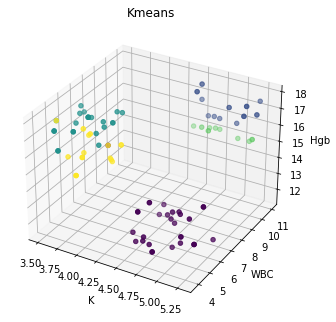

In [226]:
import itertools

def make_chart (chart_data, y_pred, labels, title=''):
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.set_zlabel(labels[2])
    ax.set_title(title) 
    ax.scatter(chart_data[:,0], chart_data[:,1], chart_data[:,2], c=y_pred)

make_chart(EMR3d1, y_pred_KMeans1, variables1, 'Kmeans')


## Task 1 (_max score - 50 points_)
Implement  Lloyd's Algorithm for solving the K-Means problem, as shown in class. 
By examining the WCSS, choose a proper threshold to determine algorithm convergence.

Check your algorithm on 'EMR-Blood.xlsx' dataset. Compare your results to the _sklearn_ version - what can affect any differences you might've got?

In [173]:
# Add your code for task1 after this line, and keep it in this cell.
from scipy.spatial.distance import cdist
# Implement K-Means (X being the data)
class my_k_means:
    def __init__(self, n_clusters):
        self.n_clusters = n_clusters
        #self.threshold = threshold
    
    def fit(self, X):
        self.X = X
    
    def predict(self, X):
        # initializing random centeroids and the array of the closest indexes
        n = self.X.shape[0]
#         centroids = self.X[np.random.choice(n, size=self.n_clusters, replace = False)]
        centroids = EMR3d1[:self.n_clusters]
        closest_points = np.zeros(n).astype(int)
        # the loop until convergance
        while True:
            old_closest = closest_points.copy() 
            old_centroids = centroids  #for alternative break. should be deleted if not using threshold
            distance = cdist(self.X, centroids)
            closest_points = np.argmin(distance, axis=1)
            # update the centroids
            for i in range(self.n_clusters):
                centroids[i, :] = self.X[closest_points == i].mean(axis=0)
#             print('WCSS error as a threshold: ', self.wcss(closest_points, centroids))
#             print ('closest_points=', closest_points)
            if (self.wcss(closest_points, centroids) - self.wcss(old_closest, old_centroids)) == 0:
                break
          

        return closest_points, centroids
      
    def wcss(self, closest_points, centroids):
        error = 0
        for i in range(self.n_clusters):
            error += np.sum(np.power(np.subtract(self.X[closest_points==i], centroids[i]), 2))
        return error



C:\Anaconda3\envs\py4dp\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  This is separate from the ipykernel package so we can avoid doing imports until


91.83610462942539

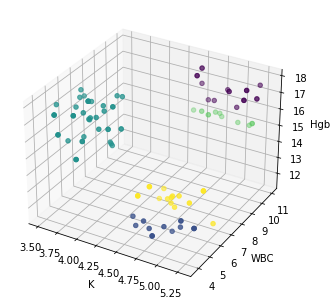

In [174]:
clf = my_k_means(5)
clf.fit(EMR3d1)
y_pred, centers = clf.predict(EMR3d1)
# clf.X[1].mean(axis=0)
# clf.X[1]
make_chart(EMR3d1, y_pred, variables1)
clf.wcss(y_pred, centers)
# centers
# closest_points


## Task 2 (_max score - 30 points_)

Humans can clearly spot 3 clusters, however, for machines it's much harder to "learn" that. In the above implementation, K-Means was given the value of 5 as K.
Develop a **generic** mechanism for finding the most reasonable number of clusters by:
1. Iterating K over a reasonable range, which should be derived from the number of points
2. Choose a proper K based on the heuristics learned in class
3. Showing the final clusters in a 3D chart (for your implementation of K-Means algorithm)

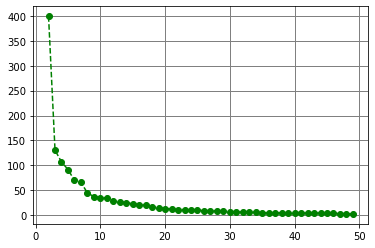

In [175]:
# Add your code for Challenge 211 after this line, and keep it in this cell.
results={}
for k in range(2, 50, 1):
    clf = my_k_means(k)
    clf.fit(EMR3d1)
    y_pred, centers = clf.predict(EMR3d1)
    results[k] = clf.wcss(y_pred, centers)

# plt.grid(color='grey', linestyle='-', linewidth=1)    
plt.grid(color='grey', linestyle='-', linewidth=1)
plt.plot(list(results.keys()), list(results.values()), 'go--')


In [ ]:
# results.keys()
# results.values()
# np.argmax(list(results.values()))
# max(results, key=results.get)
# results

### Answer: 
We can select the optimal k by using the "elbow" point from the plot above.  
The elbow is at the second point which is k = 3

### Silhouette analysis

Use graphic visualization of the Silhouette score to support your above answer:

optimal k by silhouette 3
optimal silhouette = 0.656649427042904


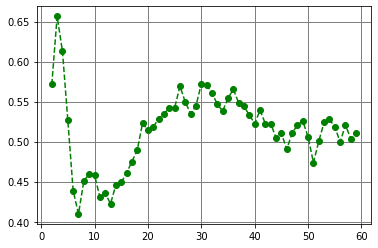

In [176]:
# Add your code for the Sillhouette graphic analysis
# You can use scikit-learn Sillhouette page as a reference

from sklearn.metrics import silhouette_score

def sil_score(data, k):
    # YOUR CODE HERE
    clf = my_k_means(k)
    clf.fit(data)
    y_pred, centers = clf.predict(data)
    silhouette_avg = silhouette_score(data, y_pred)
#     print('k =', k, ' average silhouette_score is :', silhouette_avg)
    
    return silhouette_avg

silhouette={}

for k in range(2, 60, 1):
    silhouette[k] = sil_score(EMR3d1, k)
    
print('optimal k by silhouette', max(silhouette, key=silhouette.get))
print('optimal silhouette =', np.max(list(silhouette.values())))
plt.grid(color='grey', linestyle='-', linewidth=1)
plt.plot(list(silhouette.keys()), list(silhouette.values()), 'go--')

### Answer: 
We can see from the plot above that the highest average silhouette score is for k=3, 
similar to our preivous answer.

#### From this section on - please use the sklearn's K-means

## Part 2: Mixture Models Clustering 

### Use K-Means to create clusters according to variables of both uniform and Gaussian distributions

C:\Anaconda3\envs\py4dp\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  """


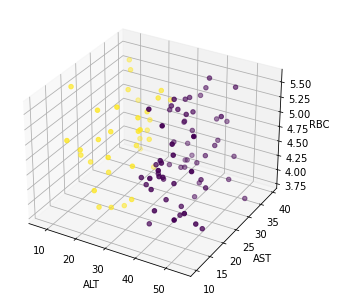

In [209]:
# Retrieve the ALT, AST and RBC column values from the dataset to cluster
variables2 = ["ALT","AST","RBC"]
EMR3d2 = sheet1.loc[:, variables2].values

# Run the K-Means algorithm
# NOTICE, this time, we know that the correct number of clusters is 2
est = KMeans(n_clusters=2)
est.fit(EMR3d2)
y_pred_KMeans2 = est.predict(EMR3d2)

# Make a 3D chart
make_chart(EMR3d2, y_pred_KMeans2, variables2)

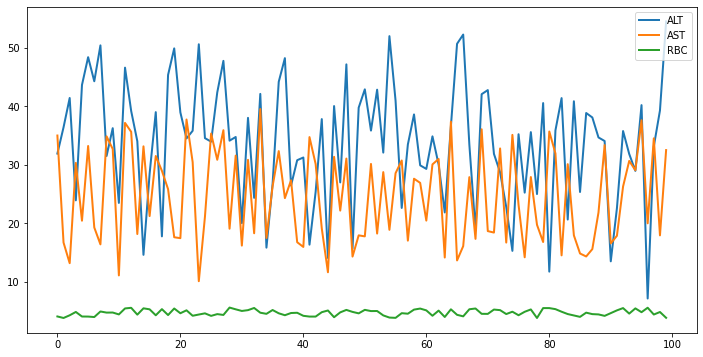

In [185]:
plt.figure(figsize=(12, 6))

for label in range(3):
    plt.plot(EMR3d2[:,label],  ls='solid', linewidth=2, markersize=12, label=variables2[label])
plt.legend()

## Task 3 (_max score - 20 points_)
Scientists have found that in this population of patients, RBC distribution is uniform, ALT distribution is a Gaussian and AST distribution is a mixture of two Gaussians. Clearly, even by giving K-Means the correct K, the algorithm got to the wrong conclusion. This separation is "technically" correct, but lacks some underlying understanding of the natural phenomena.

What is the "problem" with this separation?

In [257]:
# Your answer here
k-means makes the follwoing assumptions:
The variance of the distribution of each attribute (variable) is spherical,
all variables have the same variance, the prior probability for all k clusters are the same.
This is not the case in our example.  Hence, k-means fails,

SyntaxError: invalid syntax (Temp/ipykernel_25284/3155749647.py, line 2)

# Answer
k-means makes the follwoing assumptions:
The variance of the distribution of each attribute (variable) is spherical,
all variables have the same variance, the prior probability for all k clusters are the same.
This is not the case in our example.  Hence, k-means fails.

In order to exploit the Gaussian characteristic of the AST
1. Find the 2 componenets that comprise the AST feature by applying the GMM algorith with the proper number of components.
2. Assume that the clusters above are correct for the entire dataset (including the other features).
3. Show the final clusters (of EMR3d2) in a 3D chart

In [ ]:
,# Add your code for Challenge 212 after this line, and keep it in this cell.
from sklearn import mixture

ALT = EMR3d2[:,0].reshape(-1,1)
AST = EMR3d2[:,1].reshape(-1,1)
RBC = EMR3d2[:,2].reshape(-1,1)

clf = mixture.GaussianMixture(n_components=2, covariance_type="full")
# clf.fit(EMR3d2)
clf.fit(ALT)
y_pred_GMM = clf.predict(AST)
make_chart(EMR3d2, y_pred_GMM, variables2, 'GMM')

print('AST 2 components characteristics:')
print('mean:%s \ncovariances:%s' %(clf.means_, clf.covariances_))

make_chart(EMR3d2, y_pred_KMeans2, variables2, 'Kmeans')

In [ ]:
# EMR3d2[:,0].shape
EMR3d2
EMR3d2[:,1].reshape(-1,1).shape

What is the difference between the two clustering results above?

Which one, given the domain knowledge provided to you, makes more sense?

#### Answer:
We can see the GMM is more "mixed" than KMM. <br>
The results of GMM make more sense because we have one feature with uniform distribution and one which is a mixture of two gaussian.






# Good Luck!

